# PHYS 210 Mini-Project 05

### Diffusion

Due Wed, Dec 07, 2022 - 9am


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt2
import numpy as np
from IPython.display import HTML
import copy

"""
This project generates an animation of a liquid spreading in a fluid.
It initially generates constants, then uses a for loop to iterate upon the data.

it then fits the spread of the fluid with a gaussian distribution, then plots dstd/dt
then, shows that concentrations remains constant over time.

"""

# Constants:
L = 1  # Size of 'box'
D = 1e-3
# We will include the phantom grid perimeter in our number of points
# to minimize additional complicated bookkeeping
N = 101

dx = L/N
dy = L/N

dt = 1e-2

tmax = 100
steps = int(tmax / dt) + 1

# Create initial conditions:
C = np.zeros((N, N))

C[N//2, N//2] = 10

# Set particles in a blob in the center:

# Our initial number of particles is the sum of C across
# all of our non-phantom grid points
isum = np.sum(C[1:-1, 1:-1])
K = dt / dx / dy * D


# C-prime (the concentrations after each time step)
Cp = np.zeros((N, N))

# Animation stuff
frames = int(0.2 / dt)  # Every 0.2s
fig = plt.figure()  # Create a new figure
ims = []  # List to store our grids of random numbers
name = "timelapse.webm"

# Part 3 things
x = np.linspace(0, L, N)
plotsteps = np.asarray(np.linspace(
    np.sqrt(0.01), np.sqrt(10), 30)**2/dt, dtype='int')
plottimes = plotsteps*dt

# From https://www.geeksforgeeks.org/python-gaussian-fit/
def gauss(x, A, sigma):
    """Gaussian fitting function, returns G(x,A,sigma)"""
    return A * np.exp(-(x - L/2) ** 2 / (2 * sigma ** 2))


# Part 4 things
concentrations = []


sigmas = []
guesses = (4, 1)

# Printing total concentration
print("Initial Concentration: ", np.sum(C))


Initial Concentration:  10.0


<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

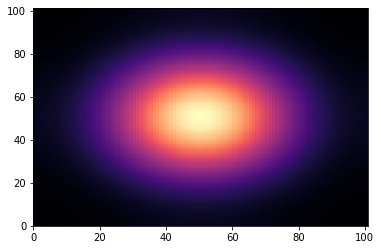

In [2]:

for i in range(steps):
    # Do all the points, except the boundaries:
    for j in range(N - 2):
        for k in range(N - 2):
            Cp[j + 1, k + 1] = C[j + 1, k + 1] + (K * (C[j, k + 1] + C[j + 2, k + 1] - 2 * C[j + 1, k + 1]) +
                                                  K * (C[j + 1, k] + C[j + 1, k + 2] - 2 * C[j + 1, k + 1]))
    # Boundary conditions
    Cp[:, 0] = Cp[:, 1]
    Cp[:, -1] = Cp[:, -2]
    Cp[0, :] = Cp[1, :]
    Cp[-1, :] = Cp[-2, :]

    # Swap C and Cp so that they don't end up as the same array:
    C, Cp = Cp, C
    if i % frames == 0:  # Check if making frame or not
        ims.append((plt.pcolormesh(C, cmap="magma"), ))
        # print(i/frames)

    # Gathering data for part 3
    if i in plotsteps:
        popt, pcov = curve_fit(gauss, x, C[:, N//2], p0=guesses)
        sigmas.append(popt[1])
        guesses = popt

    # Gathering data for part 4
    concentrations.append(np.sum(C[1:-1, 1:-1]))


# Generating animation
imani = animation.ArtistAnimation(
    fig,  # Not used here, but would be needed for resizing, etc
    ims,  # The list to animate
    interval=60,  # Time between frames in ms
    repeat=False,  # Repeat not used here. Useful in later projects
)

# Save file
imani.save(name, extra_args=['-vcodec', 'libvpx'])
plt.close()  # Prevents a stray plot from appearing
del ims  # Release crucial Cocal memory related to these objects
del imani  #

print("Final Concentration: ", np.sum(C[1:-1, 1:-1]))

In [ ]:
HTML('<video controls> <source src="timelapse.webm" type="video/webm"> '
     '</video>')


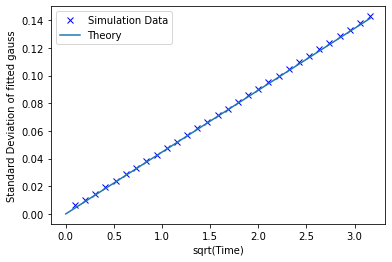

In [ ]:
# Part 3
xs = np.linspace(0, 10, 100)

# Plotting part 3
plt2.plot(np.sqrt(plottimes), -1*np.array(sigmas),
          'bx', label="Simulation Data")
plt2.plot(np.sqrt(xs), np.sqrt(2*D*xs), label="Theory")

plt2.xlabel('sqrt(Time)')
plt2.ylabel('Standard Deviation of fitted gauss')

plt2.legend()
plt2.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt2
import numpy as np
from IPython.display import HTML
import copy
"""
This project generates an animation of a liquid spreading in a fluid.
It initially generates constants, then uses a for loop to iterate upon the data.

it then fits the spread of the fluid with a gaussian distribution, then
plots dstd/dt then, shows that concentrations remains constant over time.
"""

# Constants:
L = 1  # Size of 'box'
D = 1e-3
# We will include the phantom grid perimeter in our number of points
# to minimize additional complicated bookkeeping
N = 101

dx = L / N
dy = L / N

dt = 1e-2

tmax = 100
steps = int(tmax / dt) + 1

# Create initial conditions:
C = np.zeros((N, N))

C[N // 2, N // 2] = 10

# Set particles in a blob in the center:

# Our initial number of particles is the sum of C across
# all of our non-phantom grid points
isum = np.sum(C[1:-1, 1:-1])
K = dt / dx / dy * D

# C-prime (the concentrations after each time step)
Cp = np.zeros((N, N))

# Animation stuff
frames = int(0.2 / dt)  # Every 0.2s
fig = plt.figure()  # Create a new figure
ims = []  # List to store our grids of random numbers
name = "timelapse.webm"

# Part 3 things
x = np.linspace(0, L, N)
plotsteps = np.asarray(np.linspace(np.sqrt(0.01), np.sqrt(10), 30)**2 / dt,
                       dtype='int')
plottimes = plotsteps * dt


# From https://www.geeksforgeeks.org/python-gaussian-fit/
def gauss(x, A, sigma):
    """Gaussian fitting function, returns G(x,A,sigma)"""
    return A * np.exp(-(x - L / 2)**2 / (2 * sigma**2))


# Part 4 things
concentrations = []

sigmas = []
guesses = (4, 1)

# Printing total concentration
print("Initial Concentration: ", np.sum(C))

Initial Concentration:  10.0


<Figure size 432x288 with 0 Axes>

ValueError: x and y must have same first dimension, but have shapes (10001,) and (0,)

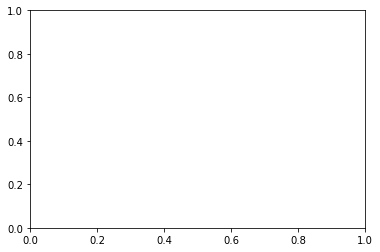

In [ ]:
# Plot of particle count (sum of non-phantom C) vs t here:
# YOUR CODE HERE
# raise NotImplementedError()

t = np.linspace(0, tmax, steps)

plt2.plot(t, concentrations,
          '-', label="Concentration Sum")

plt2.xlabel('Time(s)')
plt2.ylabel('Concentration')

plt2.legend()
plt2.show()


### Your answers to text questions for Part 5 questions here. There is an ungraded, un-timed and not-style-checked cell below for you to do your work for anwering these questions

Answer the following questions in the space provided in this cell.

**5a)** What happens to the animation when dt is too large?

**5b)** What is the value of dt where the simulation diverges?

**5c)** What is the value of $dt \, D/dx^2$ where the simulation starts to diverge?

**5d)** What happens to the sums you generate for question (4) when the simulation diverges?

**5e)** If you use a grid of only 51x51 points, where is the threshold for dt to converge now?

YOUR ANSWER HERE


In [3]:
# Experiment with dt here (this code will not be assessed in any way)
# Create initial conditions:
"""
5a) it begins to flicker, likely due to the switching between C and Cp
5b) my simulation begins to diverge at values greater than 2.5e-2
5c) it begins to diverge to infinity
5d) it approaches infinity
5e) it does not change, still 2.5e-2


"""
dt = 2.6e-2
N = 51

tmax = 10
steps = int(tmax / dt) + 1

C = np.zeros((N, N))

C[N//2, N//2] = 10

# Set particles in a blob in the center:

# Our initial number of particles is the sum of C across
# all of our non-phantom grid points
isum = np.sum(C[1:-1, 1:-1])
K = dt / dx / dy * D


# C-prime (the concentrations after each time step)
Cp = np.zeros((N, N))

# Animation stuff
frames = int(0.2 / dt)  # Every 0.2s
fig = plt.figure()  # Create a new figure
ims = []  # List to store our grids of random numbers
name = "timelapse2.webm"

# Printing total concentration
print("Initial Concentration: ", np.sum(C))

for i in range(steps):
    # Do all the points, except the boundaries:
    for j in range(N - 2):
        for k in range(N - 2):
            Cp[j + 1, k + 1] = C[j + 1, k + 1] + (K * (C[j, k + 1] + C[j + 2, k + 1] - 2 * C[j + 1, k + 1]) +
                                                  K * (C[j + 1, k] + C[j + 1, k + 2] - 2 * C[j + 1, k + 1]))

    # Boundary conditions
    Cp[:, 0] = Cp[:, 1]
    Cp[:, -1] = Cp[:, -2]
    Cp[0, :] = Cp[1, :]
    Cp[-1, :] = Cp[-2, :]

    # Swap C and Cp so that they don't end up as the same array:
    C, Cp = Cp, C

    if i % frames == 0:  # Check if making frame or not
        ims.append((plt.pcolormesh(C, ), ))
        print(K * (C[N//2, N//2 + 1] +
              C[N//2 + 2, N//2 + 1] - 2 * C[N//2 + 1, N//2 + 1]))
        # print(i/frames)


# Generating animation
imani = animation.ArtistAnimation(
    fig,  # Not used here, but would be needed for resizing, etc
    ims,  # The list to animate
    interval=60,  # Time between frames in ms
    repeat=False,  # Repeat not used here. Useful in later projects
)
# Save file
imani.save(name, extra_args=['-vcodec', 'libvpx'])
plt.close()  # Prevents a stray plot from appearing
del ims  # Release crucial Cocal memory related to these objects
del imani  #

print("Final Concentration: ", np.sum(C[1:-1, 1:-1]))

HTML('<video controls> <source src="timelapse2.webm" type="video/webm"> '
     '</video>')


Initial Concentration:  10.0
0.70344831076
-0.8077826296302042
1.0961985837632502
-1.7813776739112912
3.111550613583614
-5.717776912556347
10.843108001482742
-21.05278394081073
41.590953697006746
-83.29640879810214
168.65045510027255
-344.5390699212282
709.1381439113874
-1468.8273667054057
3058.91357579771
-6400.412765150452
13447.411789535747
-28356.318619835856
59988.30367554672
-127274.55634456454
270738.212504558
-577275.3183784769
1233527.9421023289
-2640989.8190010395
5664549.900318428
-12169778.688094527
26185648.2599911
-56423264.02152363
121737212.09963784
-262977913.87934676
568735512.139258
-1231301143.9040842
2668404874.3660684
-5788231231.893935
12566726716.991592
-27305997868.638466
59378976129.02799
-129219150365.36534
281399115809.3034
-613202115695.2781
1337070023404.7678
-2917156909347.5137
6368058093261.392
-13908590796164.057
30393183495709.375
-66446937107436.49
145334547575755.84
-318015205046690.7
696149617443630.1
-1524488111401847.0
3339671797249417.5
-73186978

# Acknowledgements

In the cell below, please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."


_Acknowledgements here:_


# Extension Code and Description

All solution code for the main project question should appear in the two main cells above above. Project extensions go in the cell "cell-extension" immediately below and the descriptions of your extension go in the cell below that.


In [8]:
# OPTIONAL project extension here
# These can call functions in your code above if desired
"""
This extension isnt too complicated, its just creating a new plot with random
points and concentrations
"""
dt = 1e-2
N = 51

tmax = 20
steps = int(tmax / dt) + 1

C = np.zeros((N, N))
for i in range(4):

    j = np.random.randint(0, N)
    k = np.random.randint(0, N)
    c = np.random.randint(50)
    C[j, k] = c
# C[N//2, N//2] = 10
# Set particles n a blob in the center:

# Our initial number of particles is the sum of C across
# all of our non-phantom grid points
isum = np.sum(C[1:-1, 1:-1])
K = dt / dx / dy * D


# C-prime (the concentrations after each time step)
Cp = np.zeros((N, N))

# Animation stuff
frames = int(0.2 / dt)  # Every 0.2s
fig = plt.figure()  # Create a new figure
ims = []  # List to store our grids of random numbers
name = "timelapse3.webm"

# Printing total concentration
print("Initial Concentration: ", np.sum(C))

for i in range(steps):
    # Do all the points, except the boundaries:
    for j in range(N - 2):
        for k in range(N - 2):
            Cp[j + 1, k + 1] = C[j + 1, k + 1] + (K * (C[j, k + 1] + C[j + 2, k + 1] - 2 * C[j + 1, k + 1]) +
                                                  K * (C[j + 1, k] + C[j + 1, k + 2] - 2 * C[j + 1, k + 1]))

    # Boundary conditions
    Cp[:, 0] = Cp[:, 1]
    Cp[:, -1] = Cp[:, -2]
    Cp[0, :] = Cp[1, :]
    Cp[-1, :] = Cp[-2, :]

    # Swap C and Cp so that they don't end up as the same array:
    C, Cp = Cp, C

    if i % frames == 0:  # Check if making frame or not
        ims.append((plt.pcolormesh(C, ), ))


# Generating animation
imani = animation.ArtistAnimation(
    fig,  # Not used here, but would be needed for resizing, etc
    ims,  # The list to animate
    interval=60,  # Time between frames in ms
    repeat=False,  # Repeat not used here. Useful in later projects
)
# Save file
imani.save(name, extra_args=['-vcodec', 'libvpx'])
plt.close()  # Prevents a stray plot from appearing
del ims  # Release crucial Cocal memory related to these objects
del imani  #

print("Final Concentration: ", np.sum(C[1:-1, 1:-1]))

HTML('<video controls> <source src="timelapse3.webm" type="video/webm"> '
     '</video>')

Initial Concentration:  10.0
Final Concentration:  10.0


_In this cell, please describe any new language features or project extension you have implemented:_


# Grading cells

The cells below marked as "grade use only" are created as placeholders so that we can provide a manual grade and comments for each category.

Exceptions are the "2. Style" test, which has an associated autograder test that you can run to check style and the timing cell "cell-optimization0", which you can use to test your code execution time.


In [ ]:
# 1. Code execution (grader use only)


In [ ]:
# 2. Style: pep8 (see note below regarding use of the Format button to fix many errors)
#
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project05.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py


checking cell: cell-project5-1
Style errors or warnings found:
55:1: E302 expected 2 blank lines, found 1
60:1: E305 expected 2 blank lines after class or function definition, found 1
73:80: E501 line too long (109 > 79 characters)
74:80: E501 line too long (108 > 79 characters)
92:1: W293 blank line contains whitespace
94:40: E231 missing whitespace after ','
110:45: E231 missing whitespace after ','
checking unnamed cell
checking cell: cell-project5-3
Style errors or warnings found:
5:18: E231 missing whitespace after ','
5:23: E231 missing whitespace after ','
checking cell: cell-project5-5
Style errors or warnings found:
46:80: E501 line too long (109 > 79 characters)
47:80: E501 line too long (108 > 79 characters)
48:1: W293 blank line contains whitespace
78:45: E231 missing whitespace after ','


AssertionError: 

Also note that you can use the Format button while in a code cell to automagically fix most pep8 errors (other than way too long print statements)

![](project02-format.png)


In [ ]:
# 3. Results (grader use only)


In [ ]:
# 4. Readability (grader use only)


In [ ]:
# 5. Plot (grader use only)


In [ ]:
# Check execution time
nb_name = "project05.ipynb"
cells_to_time = []
stop_at = ['cell-extension']
%run - i time_cells2.py


In [ ]:
# 5. Code optimization/timing (grader use only)


In [ ]:
# B2. New Functionality/Language features (grader use only)
